In [1]:
import numpy as np # linear algebra
import pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gym
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv, generate_random_map
from machine_learning_cs7641.assignment_4.Learners.ValueIteration import ValueIteration
from machine_learning_cs7641.assignment_4.Learners.PolicyIteration import PolicyIteration
from machine_learning_cs7641.assignment_4.Learners.QLearner import QLearner
import matplotlib.pyplot as plt
import time

16
Discrete(4)

SFFF
FHFH
FFFH
HFFG


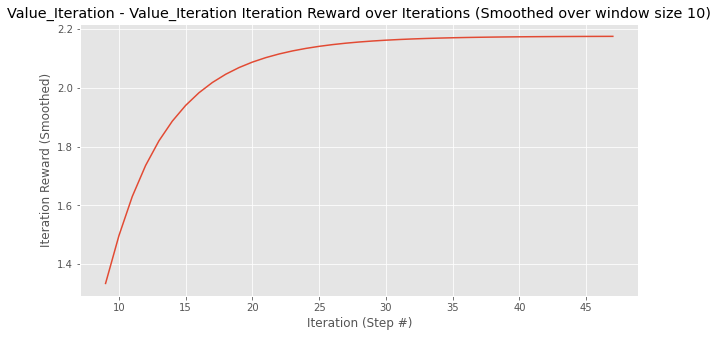

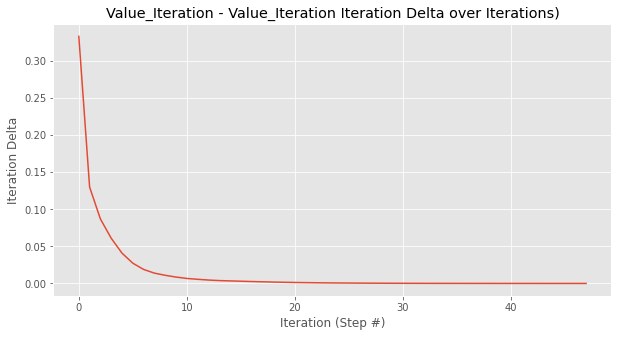

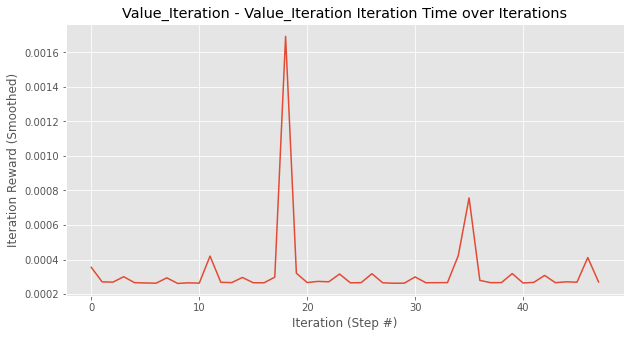

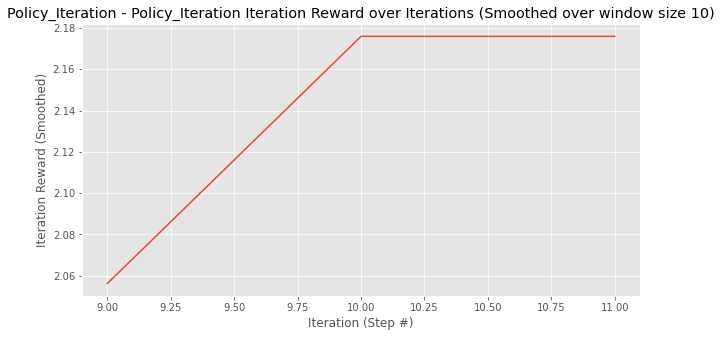

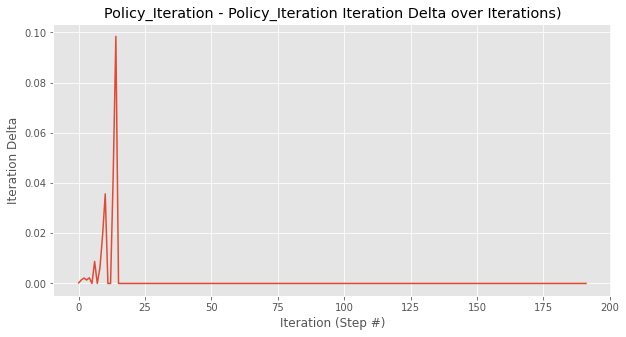

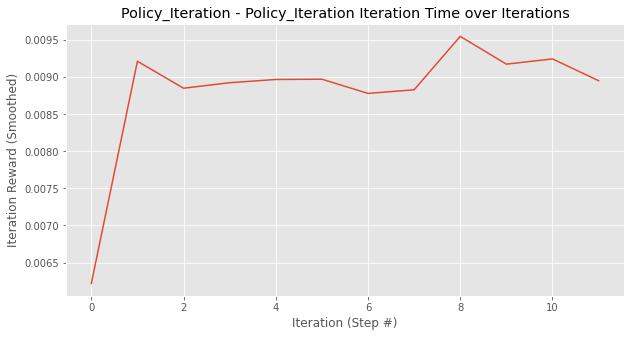

stats were: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.

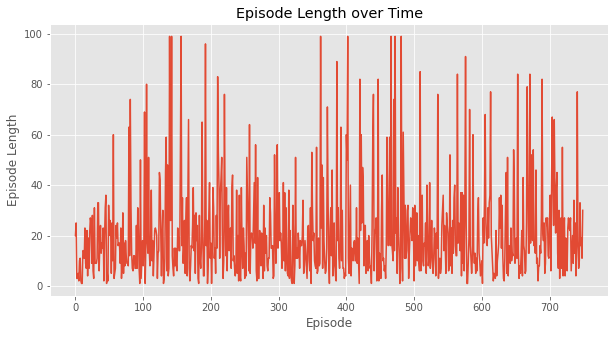

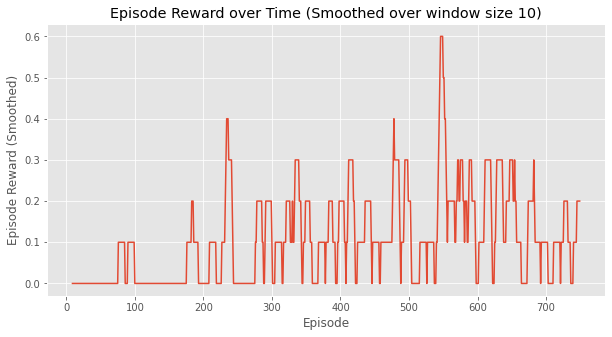

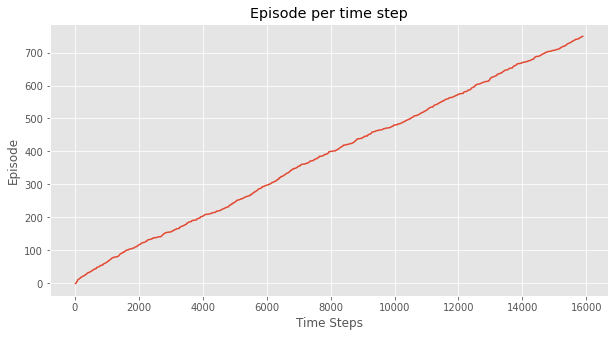

Average Q reward was: 0.10533333333333333
Max Q reward was: 1.0
Comparing Policies - 
 Val -  [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]] 
 Policy Iteration - [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]] 
 Q Policy - ['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__

In [39]:
env_exp = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
print(env_exp.nS)
print(env_exp.action_space)
env_exp.render()

value_learner = ValueIteration(env_exp, discount_factor=.9)  # care about all rewards
value_learner.run()
value_learner.plot("FrozenLake-4", show=True)
value_policy = value_learner.get_policy()
plt.close()

env_exp.reset()
policy_learner = PolicyIteration(env_exp, discount_factor=.9)  # care about all rewards
policy_learner.run()
policy_learner.plot("FrozenLake-4", show=True)
pol_policy = policy_learner.get_policy()
plt.close()

env_exp.reset()
q_learner = QLearner(env_exp, random=False, max_episodes=750, discount_factor=.9, log=False)  # care about all rewards
stats = q_learner.run()
print(f"stats were: {stats.episode_rewards}")
q_learner.plot("FrozenLake-4", smoothing_window=10, show=True)
q_policy = q_learner.get_policy()
avg_reward_q = np.mean(q_learner.stats.episode_rewards)
max_reward_q = np.max(q_learner.stats.episode_rewards)
print(f"Average Q reward was: {avg_reward_q}")
print(f"Max Q reward was: {max_reward_q}")

print(f"Comparing Policies - \n Val -  {value_policy} \n Policy Iteration - {pol_policy} \n Q Policy - {dir(q_policy)}")

###This section is playing with hyper paramters for our Q Learner - alpha

On Alpha: 0.5
On Alpha: 0.6
On Alpha: 0.7
On Alpha: 0.8
On Alpha: 0.9
On Alpha: 0.999
     Mean V  Max V  Reward  Time
0.5  0.0365    1.0   365.0   0.0
0.6  0.0141    1.0   141.0   0.0
0.7  0.0241    1.0   241.0   0.0
0.8  0.0034    1.0    34.0   0.0
0.9  0.0080    1.0    80.0   0.0


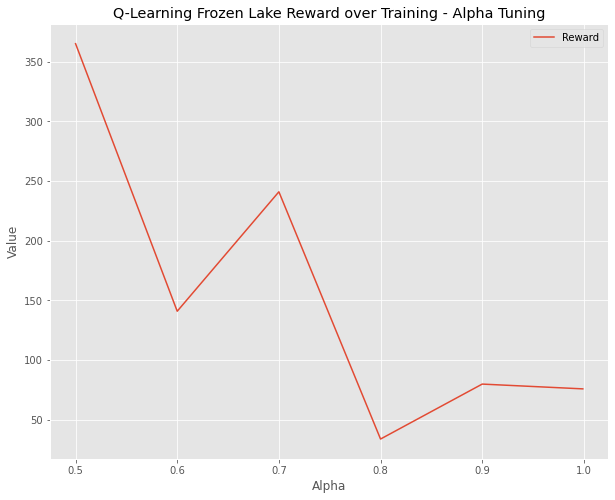

In [73]:

alphas = [.5,.6,.7,.8,.9,.999]
alpha_results = []

plt.rcParams["figure.figsize"] = (10,8)
alpha_v_fig = plt.figure()
plt.xlabel("Alpha")
plt.ylabel("Value")
plt.title("Q-Learning Frozen Lake Reward over Training - Alpha Tuning")

for alpha in alphas:
    print(f"On Alpha: {alpha}")
    env_exp.reset()
    q_learner = QLearner(env_exp, random=True, alpha=alpha, max_episodes=10000, discount_factor=.9, log=False)  # care about all rewards
    q_learner.run()
    result = {}
    # result["Alpha"] = alpha
    result["Mean V"] = np.mean(q_learner.stats.episode_rewards)
    result["Max V"] = np.max(q_learner.stats.episode_rewards)
    result["Reward"] = np.sum(q_learner.stats.episode_rewards)
    result["Time"] = np.sum(q_learner.stats.episode_times)
    alpha_results.append(result)

# print(alpha_results)
df = pd.DataFrame(data=alpha_results, index=alphas)
print(df.head(5))
df["Reward"].plot()
plt.legend(loc='best')
plt.show()
plt.close()

# q_learner = QLearner(env_exp, random=False, max_episodes=750, discount_factor=.9, log=False)  # care about all rewards
# stats = q_learner.run()
# print(f"stats were: {stats.episode_rewards}")
# q_learner.plot("FrozenLake-4", smoothing_window=10, show=True)
# q_policy = q_learner.get_policy()
# avg_reward_q = np.mean(q_learner.stats.episode_rewards)
# max_reward_q = np.max(q_learner.stats.episode_rewards)
# print(f"Average Q reward was: {avg_reward_q}")
# print(f"Max Q reward was: {max_reward_q}")


In [26]:
best_q_alpha = .5

Done Alpha

Start Gamma

On epsilon: 0.5
On epsilon: 0.6
On epsilon: 0.7
On epsilon: 0.8
On epsilon: 0.9
On epsilon: 0.95
On epsilon: 0.99
     Mean V  Max V  Reward  Time
0.5  0.0043    1.0    43.0   0.0
0.6  0.0014    1.0    14.0   0.0
0.7  0.0008    1.0     8.0   0.0
0.8  0.0022    1.0    22.0   0.0
0.9  0.0044    1.0    44.0   0.0


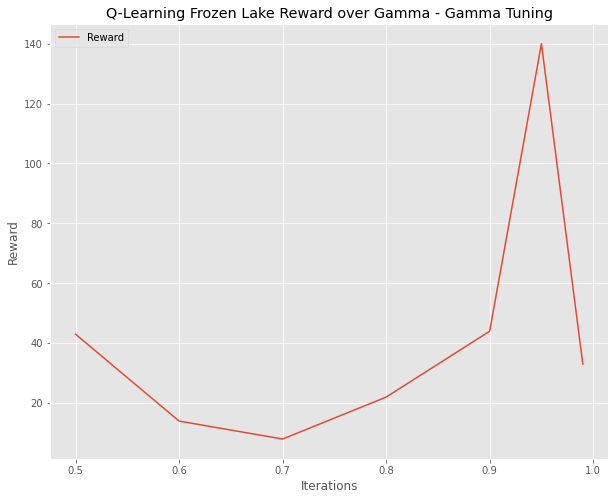

In [71]:

gammas = [.5,.6,.7,.8,.9,.95,.99]
gamma_results = []

gamma_v_fig = plt.figure(figsize=(10,8))
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Q-Learning Frozen Lake Reward over Gamma - Gamma Tuning")

for gamma in gammas:
    print(f"On epsilon: {gamma}")
    env_exp.reset()
    q_learner = QLearner(env_exp, random=True, epsilon=.01, alpha=best_q_alpha, max_episodes=10000, discount_factor=gamma, log=False)  # care about all rewards
    q_learner.run()
    result = {}
    # result["Alpha"] = alpha
    result["Mean V"] = np.mean(q_learner.stats.episode_rewards)
    result["Max V"] = np.max(q_learner.stats.episode_rewards)
    result["Reward"] = np.sum(q_learner.stats.episode_rewards)
    result["Time"] = np.sum(q_learner.stats.episode_times)
    gamma_results.append(result)

# print(alpha_results)
df = pd.DataFrame(data=gamma_results, index=gammas)
print(df.head(5))
df["Reward"].plot()
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
best_gamma = .95

End Gamma

Start Epsilon

On epsilon: 0.01
On epsilon: 0.1
On epsilon: 0.3
On epsilon: 0.5
On epsilon: 0.7
      Mean V  Max V  Reward  Time
0.01  0.0024    1.0    24.0   0.0
0.10  0.0155    1.0   155.0   0.0
0.30  0.0157    1.0   157.0   0.0
0.50  0.0159    1.0   159.0   0.0
0.70  0.0147    1.0   147.0   0.0


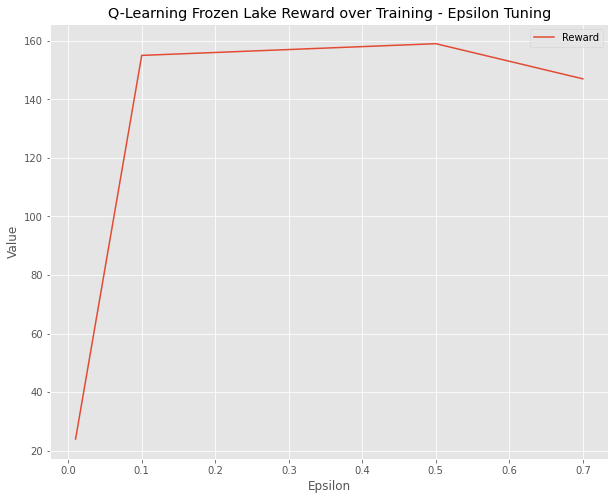

In [72]:

epsilons = [.01,.1,.3,.5,.7]
epsilon_results = []

plt.rcParams["figure.figsize"] = (10,8)
epsilon_q_fig = plt.figure()
plt.xlabel("Epsilon")
plt.ylabel("Value")
plt.title("Q-Learning Frozen Lake Reward over Training - Epsilon Tuning")

for epsilon in epsilons:
    print(f"On epsilon: {epsilon}")
    env_exp.reset()
    q_learner = QLearner(env_exp, random=True, epsilon=epsilon, alpha=best_q_alpha, max_episodes=10000, discount_factor=.9, log=False)  # care about all rewards
    q_learner.run()
    result = {}
    # result["Alpha"] = alpha
    result["Mean V"] = np.mean(q_learner.stats.episode_rewards)
    result["Max V"] = np.max(q_learner.stats.episode_rewards)
    result["Reward"] = np.sum(q_learner.stats.episode_rewards)
    result["Time"] = np.sum(q_learner.stats.episode_times)
    epsilon_results.append(result)

# print(alpha_results)
df = pd.DataFrame(data=epsilon_results, index=epsilons)
print(df.head(5))
df["Reward"].plot()
plt.legend(loc='best')
plt.show()
plt.close()

In [74]:
best_q_epsilon = .5

End Epsilon

Best Q Learner Begin

In [75]:
env_exp.reset()
best_q_learner = QLearner(env_exp, random=False, epsilon=best_q_epsilon, alpha=best_q_alpha, max_episodes=750, discount_factor=.9, theta=.01, log=False)  # care about all rewards
stats = best_q_learner.run()

stats were: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

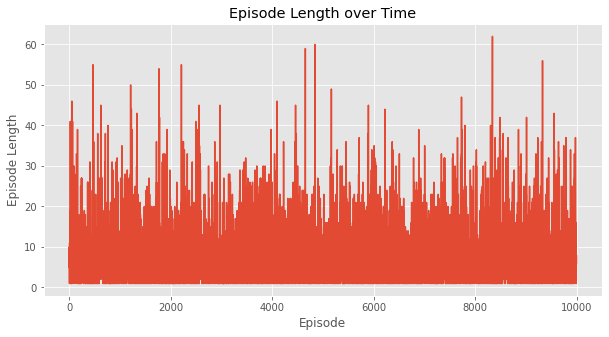

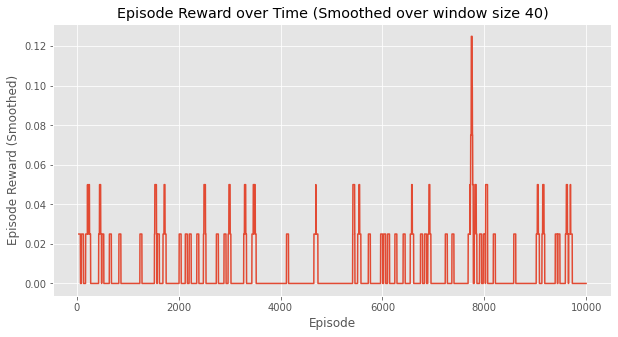

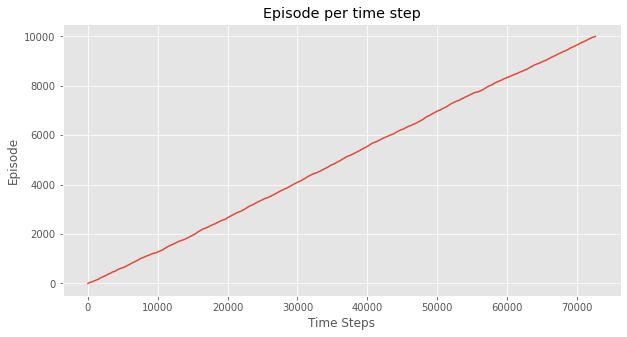

Average Best Q reward was: 0.0076


In [76]:
print(f"stats were: {stats.episode_rewards}")
q_learner.plot("FrozenLake-4-Best", smoothing_window=40, show=True)
best_q_policy = q_learner.get_policy()
avg_reward_q = np.mean(q_learner.stats.episode_rewards)
max_reward_q = np.max(q_learner.stats.episode_rewards)
print(f"Average Best Q reward was: {avg_reward_q}")

In [77]:
print(f"Q Learner Converged - {q_learner.converged()}")

Q Learner Converged - False


Best Q Learner End

Value Iteration Begin

Begin Gamma Tuning

On epsilon: 0.5
On epsilon: 0.6
On epsilon: 0.7
On epsilon: 0.8
On epsilon: 0.9
On epsilon: 0.95
On epsilon: 0.99
       Mean V     Max V     Reward      Time
0.5  0.591351  0.637415   6.504865  0.004712
0.6  0.711291  0.772671   9.958071  0.007022
0.7  0.893479  0.979693  16.082616  0.009452
0.8  1.212011  1.340356  30.300286  0.008850
0.9  1.974558  2.175878  94.778786  0.015936


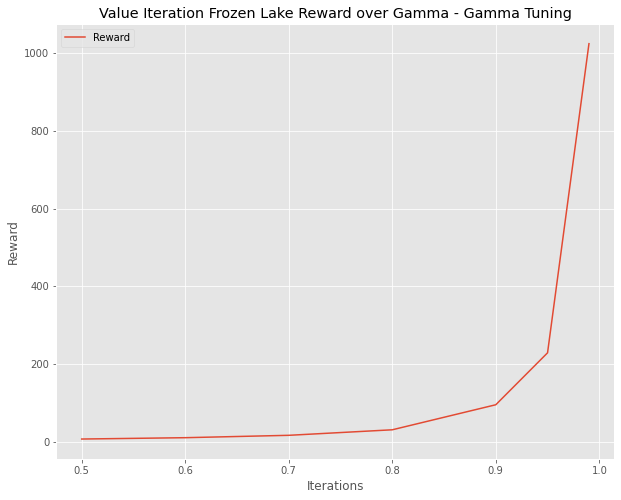

In [43]:

gammas = [.5,.6,.7,.8,.9,.95,.99]
gamma_results = []

value_gamma_reward_fig = plt.figure(figsize=(10,8))
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Value Iteration Frozen Lake Reward over Gamma - Gamma Tuning")

for gamma in gammas:
    print(f"On epsilon: {gamma}")
    env_exp.reset()
    vl_learner = ValueIteration(env_exp, discount_factor=gamma, log=False)  # care about all rewards
    vl_learner.run()
    result = {}
    # result["Alpha"] = alpha
    result["Mean V"] = np.mean(vl_learner._rewards_per_step)
    result["Max V"] = np.max(vl_learner._rewards_per_step)
    result["Reward"] = np.sum(vl_learner._rewards_per_step)
    result["Time"] = np.sum(vl_learner._step_times)
    gamma_results.append(result)

# print(alpha_results)
df = pd.DataFrame(data=gamma_results, index=gammas)
print(df.head(5))
df["Reward"].plot()
plt.legend(loc='best')
plt.show()
plt.close()


In [45]:
value_best_gamma = .9

End Gamma Tuning

Best Value Iteration

In [62]:
env_exp.reset()
best_vl_learner = ValueIteration(env_exp, discount_factor=value_best_gamma, log=False)  # care about all rewards
best_vl_learner.run()

2.1758775484617097

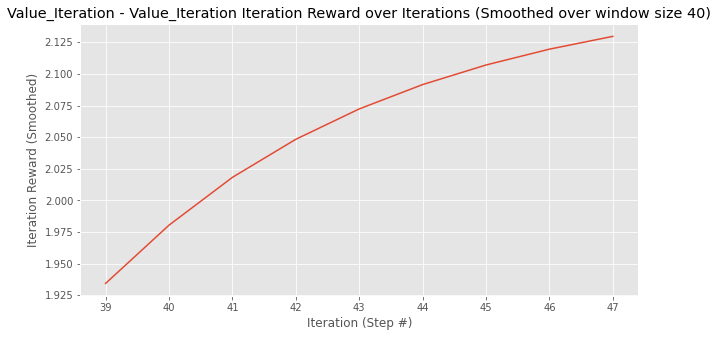

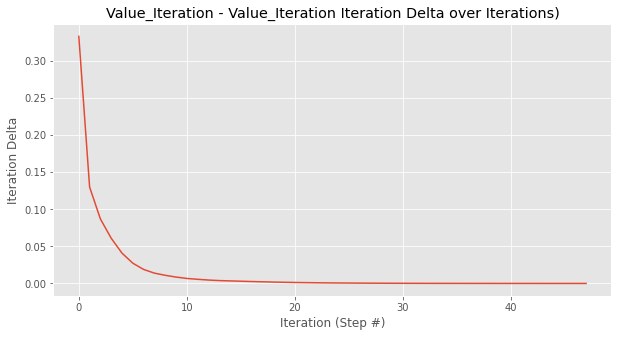

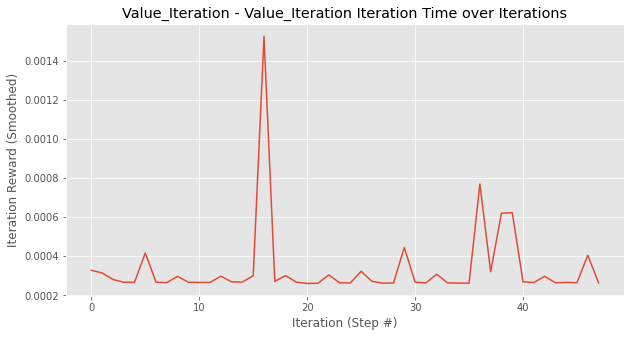

Average Best VL reward was: 2.1758775484617097


In [63]:
best_vl_learner.plot("FrozenLake-4-Best", smoothing_window=40, show=True)
best_vl_policy = best_vl_learner.get_policy()
avg_reward_vl = np.mean(best_vl_learner._rewards_per_step)
max_reward_vl = np.max(best_vl_learner._rewards_per_step)
print(f"Average Best VL reward was: {max_reward_vl}")

In [64]:
best_vl_learner.converged()

True

End Best Value Iteration

End Value Iteration

Begin Policy Iteration

Begin Gamma Tuning

On epsilon: 0.5
On epsilon: 0.6
On epsilon: 0.7
On epsilon: 0.8
On epsilon: 0.9
On epsilon: 0.95
On epsilon: 0.99
       Mean V     Max V     Reward      Time
0.5  0.628109  0.637423   7.537311  0.034134
0.6  0.757755  0.772680   9.093060  0.038202
0.7  0.954912  0.979707  11.458944  0.046249
0.8  1.295609  1.340377  15.547311  0.060456
0.9  2.076238  2.175886  24.914860  0.120935


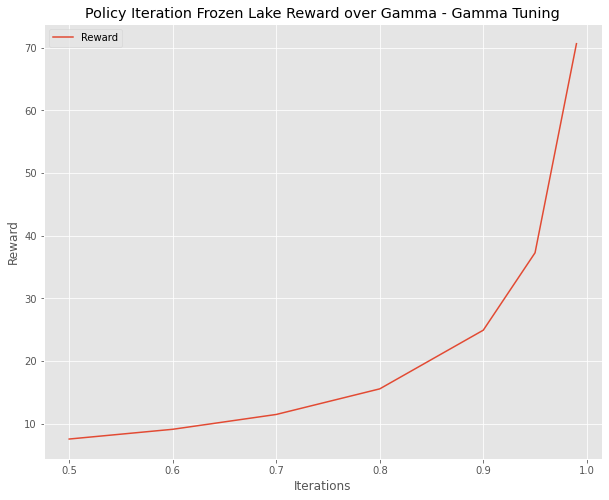

In [51]:

gammas = [.5,.6,.7,.8,.9,.95,.99]
pl_gamma_results = []

policy_gamma_reward_fig = plt.figure(figsize=(10,8))
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Policy Iteration Frozen Lake Reward over Gamma - Gamma Tuning")

for gamma in gammas:
    print(f"On epsilon: {gamma}")
    env_exp.reset()
    pl_learner = PolicyIteration(env_exp, discount_factor=gamma, log=False)  # care about all rewards
    pl_learner.run()
    result = {}
    # result["Alpha"] = alpha
    result["Mean V"] = np.mean(pl_learner._rewards_per_step)
    result["Max V"] = np.max(pl_learner._rewards_per_step)
    result["Reward"] = np.sum(pl_learner._rewards_per_step)
    result["Time"] = np.sum(pl_learner._step_times)
    pl_gamma_results.append(result)

# print(alpha_results)
df = pd.DataFrame(data=pl_gamma_results, index=gammas)
print(df.head(5))
df["Reward"].plot()
plt.legend(loc='best')
plt.show()
plt.close()


In [65]:
best_policy_gamma = .999

In [66]:
env_exp.reset()
best_pl_learner = PolicyIteration(env_exp, discount_factor=best_policy_gamma, log=False)  # care about all rewards
best_pl_learner.run()

8.534205987954204

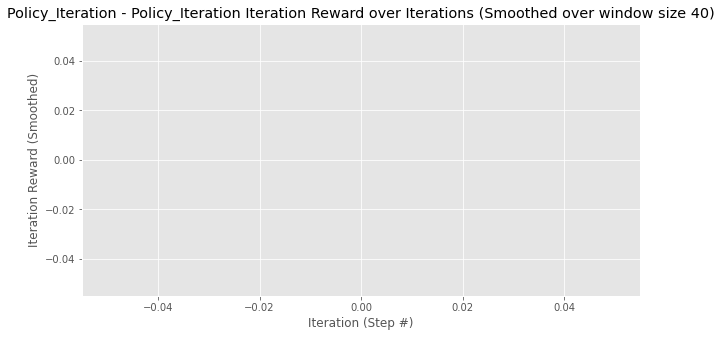

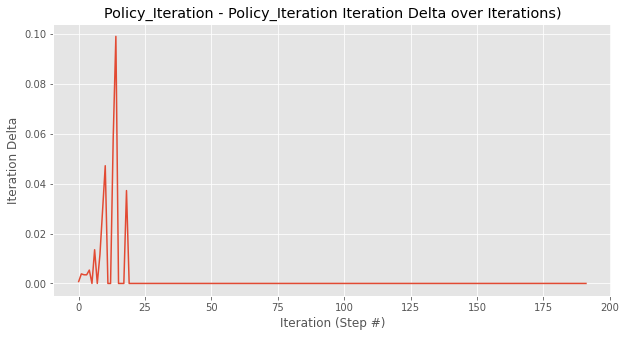

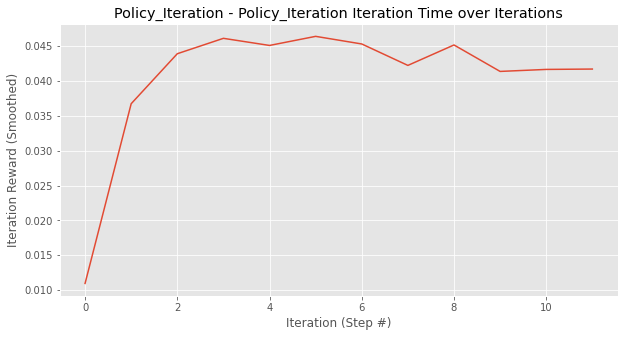

Average Best PL reward was: 7.848159580090233
Max Best PL reward was: 8.534205987954204


In [69]:
plt.close()
best_pl_learner.plot("FrozenLake-4-Best", smoothing_window=40, show=True)
best_pl_policy = best_vl_learner.get_policy()
avg_reward_pl = np.mean(best_pl_learner._rewards_per_step)
max_reward_pl = np.max(best_pl_learner._rewards_per_step)
print(f"Average Best PL reward was: {avg_reward_pl}")
print(f"Max Best PL reward was: {max_reward_pl}")

End Policy Iteration

In [70]:
print("Policy Comparison")

print(f"Val policy {best_vl_policy}")
print(f"Pol policy {best_pl_policy}")
print(f"Q Policy {best_q_policy}")

Policy Comparison
Val policy [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Pol policy [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Q Policy <function QLearner.make_epsilon_greedy_policy.<locals>.policy_fn at 0x7f4b88a95550>
